# MMClassification Tutorial
Welcome to MMClassification!

In this tutorial, we demo
* How to do inference with MMCls trained weight
* How to train on your own dataset and visualize the results. 

## Install MMClassification
This step may take several minutes.

We use PyTorch 1.5.0 and CUDA 10.1 for this tutorial. You may install other versions by change the version number in pip install command.

In [1]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130
gcc (Ubuntu 5.4.0-6ubuntu1~16.04.12) 5.4.0 20160609
Copyright (C) 2015 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
# Install PyTorch
!pip install -U torch==1.5.0+cu101 torchvision==0.6.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 703.8 MB 7.4 kB/s eta 0:00:011     |▌                               | 11.9 MB 1.2 MB/s eta 0:09:54     |█▊                              | 36.8 MB 594 kB/s eta 0:18:42     |███                             | 64.9 MB 552 kB/s eta 0:19:16     |████                            | 87.0 MB 892 kB/s eta 0:11:32     |███████▎                        | 159.5 MB 4.2 MB/s eta 0:02:11     |██████████████████              | 395.1 MB 46.4 MB/s eta 0:00:07     |██████████████████████▌         | 496.0 MB 683 kB/s eta 0:05:05     |██████████████████████████▉     | 590.1 MB 229 kB/s eta 0:08:15     |████████████████████████████▌   | 626.5 MB 347 kB/s eta 0:03:43     |██████████████████████████████▏ | 662.6 MB 59.6 MB/s eta 0:00:01     |██████████████████████████████▎ | 666.1 MB 59.6 MB/s eta 0:00:01
     |████████████████████████████████| 6.6 MB 193 kB/s eta 0:00:01
  Attempting uninstall: torch
    

In [ ]:
!rm -rf mmclassification
!git clone https://github.com/yl-1993/mmclassification.git 
%cd mmclassification
!pip install -e .

Cloning into 'mmclassification'...
remote: Enumerating objects: 1952, done.
remote: Total 1952 (delta 0), reused 0 (delta 0), pack-reused 1952
Receiving objects: 100% (1952/1952), 1.80 MiB | 306.00 KiB/s, done.
Resolving deltas: 100% (1199/1199), done.
Checking connectivity... done.
/home/yanglei/program/mmclassification/demo/mmclassification
Obtaining file:///home/yanglei/program/mmclassification/demo/mmclassification
     |████████████████████████████████| 231 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 662 kB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 190 kB 4.9 MB/s eta 0:00:01
     |███████▌                        | 11.7 MB 256 kB/s eta 0:02:31

In [2]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMClassification installation
import mmcls
print(mmcls.__version__)

1.5.0+cu101 True
0.1.0+c26675b


## Run Inference with MMCls trained weight

In [7]:
!mkdir checkpoints
!wget https://openmmlab.oss-accelerate.aliyuncs.com/mmclassification/v0/imagenet/resnet50_batch256_20200708-cfb998bf.pth -P checkpoints

--2020-10-08 19:08:32--  https://openmmlab.oss-accelerate.aliyuncs.com/mmclassification/v0/imagenet/resnet50_batch256_20200708-cfb998bf.pth
Resolving openmmlab.oss-accelerate.aliyuncs.com (openmmlab.oss-accelerate.aliyuncs.com)... 47.106.53.89
Connecting to openmmlab.oss-accelerate.aliyuncs.com (openmmlab.oss-accelerate.aliyuncs.com)|47.106.53.89|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102491894 (98M) [application/octet-stream]
Saving to: ‘checkpoints/resnet50_batch256_20200708-cfb998bf.pth’

resnet50_batch256_2 100%[===================>]  97.74M  23.0MB/s    in 4.3s    

2020-10-08 19:08:36 (22.7 MB/s) - ‘checkpoints/resnet50_batch256_20200708-cfb998bf.pth’ saved [102491894/102491894]



In [4]:
from mmcls.apis import inference_model, init_model, show_result_pyplot

In [5]:
config_file = 'configs/imagenet/resnet50_b32x8.py'
checkpoint_file = 'checkpoints/resnet50_batch256_20200708-cfb998bf.pth'

In [8]:
# build the model from a config file and a checkpoint file
model = init_model(config_file, checkpoint_file, device='cuda:0')

/home/SENSETIME/yanglei/program/mmclassification/demo/mmclassification/mmcls/apis/inference.py:41: UserWarning: Class names are not saved in the checkpoint's meta data, use imagenet by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '


In [10]:
# test a single image
img = 'demo/demo.JPEG'
result = inference_model(model, img)

/home/SENSETIME/yanglei/program/mmclassification/demo/mmclassification/mmcls/models/classifiers/base.py:216: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


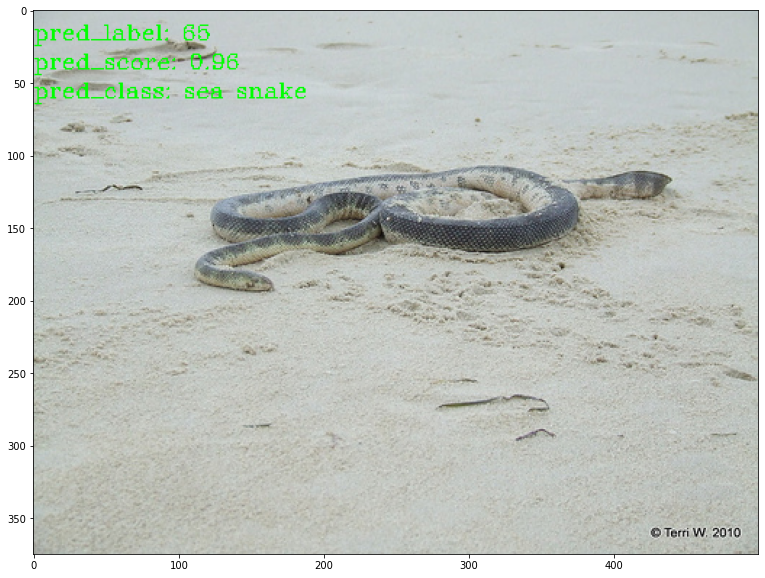

In [11]:
# show the results
show_result_pyplot(model, img, result)

## Train an image classification model on a new dataset

To train on a customized dataset, the following steps are neccessary. 
1. Add a new dataset class. 
2. Create a config file accordingly. 
3. Perform training and evaluation. 

### Add a new dataset

Datasets in MMClassification require image and ground-truth labels to be placed in folders with the same perfix. To support a new dataset, we may need to modify the original file structure. 

In this tutorial, we give an example of converting the dataset. You may refer to [docs](https://github.com/open-mmlab/mmclassification/docs/tutorials/new_dataset.md) for details about dataset reorganization. 

We use [Pokemon Image Dataset](https://www.kaggle.com/vishalsubbiah/pokemon-images-and-types) as an example. The dataset consists of 809 images crawled from [pokedex](https://pokemondb.net/pokedex/national). It contains pokemon images from generation 1 to generation 7, along with their primary and secondary types. All images are resized to 120x120.
In this tutorial, we use their primary types as classes for classification. There are 18 classes in total, i.e. Bug, Dark, Dragon, Electric, Fairy, Fighting, Fire, Flying, Ghost, Grass, Ground, Ice, Normal, Poison, Psychic, Rock, Steel and Water.

In [17]:
# download and unzip
!wget https://www.dropbox.com/s/zj6z6dhdlri3orb/pokemon.zip?dl=0 -O pokemon.zip
!unzip -oq pokemon.zip

--2021-02-24 17:50:18--  https://www.dropbox.com/s/zj6z6dhdlri3orb/pokemon.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/zj6z6dhdlri3orb/pokemon.zip [following]
--2021-02-24 17:50:19--  https://www.dropbox.com/s/raw/zj6z6dhdlri3orb/pokemon.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucea9e0d55c8967f53fe930c384d.dl.dropboxusercontent.com/cd/0/inline/BJgjoeHgcN49SDvgO5K6UPB7gpGvgOowYokJ7duIW3_q7UIMNXjuikrouERaZWfDVUA_lAkns2gjjD27DY4O1YrO6okx_6s_V6DqDHjYD_mdgioPUvR_SvfAHE_1HwsHMxg/file# [following]
--2021-02-24 17:50:19--  https://ucea9e0d55c8967f53fe930c384d.dl.dropboxusercontent.com/cd/0/inline/BJgjoeHgcN49SDvgO5K6UPB7gpGvgOowYokJ7duIW3_q7UIMNXjuikrouERaZWfDVUA_lAkns2gjjD27DY4O1YrO6okx_6s_V6DqDHjYD_mdgioPUvR_SvfAHE_1HwsHMxg/file


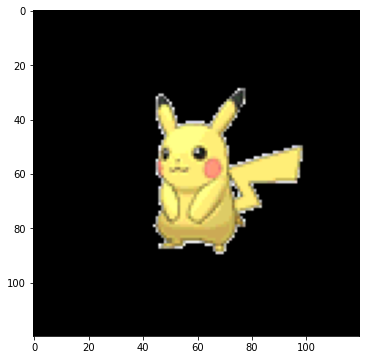

In [22]:
# Let's take a look at the dataset
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('pokemon/images/pikachu.png')
plt.figure(figsize=(8, 6))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

We need to convert the annotation into semantic map format as an image.

### Create a config file
In the next step, we need to modify the config for the training. To accelerate the process, we finetune the model from trained weights.

### Train and Evaluation

Inference with trained model